<a href="https://colab.research.google.com/github/IleckMatheus/Aprendizado-de-M-quina-2/blob/main/Tarefa_Aula5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

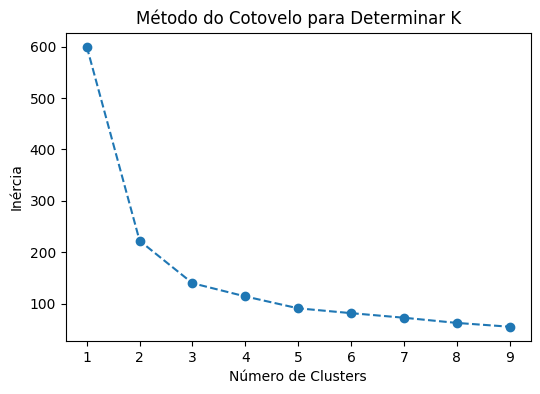

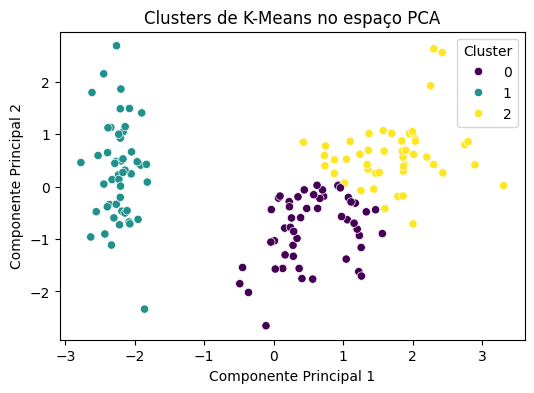

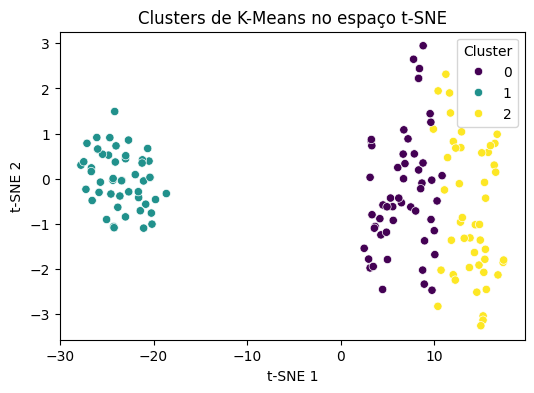

In [2]:
# Importação das bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Carregar o dataset Iris
iris = datasets.load_iris()
X = iris.data  # Características
y = iris.target  # Rótulos reais (não usados para treinamento)

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encontrar o melhor número de clusters usando o Método do Cotovelo
inertia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot do Método do Cotovelo
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o', linestyle='dashed')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Determinar K')
plt.show()

# Aplicar K-Means com o número ótimo de clusters (por exemplo, k=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Redução de dimensionalidade com PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualização dos clusters com PCA
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters de K-Means no espaço PCA')
plt.legend(title="Cluster")
plt.show()

# Redução de dimensionalidade com t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualização dos clusters com t-SNE
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=clusters, palette='viridis')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Clusters de K-Means no espaço t-SNE')
plt.legend(title="Cluster")
plt.show()


A análise do dataset Iris utilizando aprendizado não supervisionado mostrou que os dados podem ser agrupados de forma natural em três clusters distintos, o que corresponde às três espécies de flores presentes no conjunto de dados: Setosa, Versicolor e Virginica.

Conseguindo capturar corretamente os agrupamentos naturais do dataset Iris, confirmando que técnicas como K-Means, PCA e t-SNE são eficientes para análise exploratória de dados e identificação de padrões.


O K-Means conseguiu identificar padrões naturais nos dados e agrupar as amostras em três clusters, alinhados com as espécies reais.

PCA mostrou uma boa separação entre os grupos, mas ainda com alguma sobreposição entre duas classes.

t-SNE revelou uma separação mais clara, confirmando que as espécies possuem características distintas.